# Part 3: An analysis of political alignment

In this section we will use electoral data to measure political alignment & see whatever conclusions we can receive from here. Ready? Time to do a Data science

Ill start by 'Creatively Sharing' Nat's old code

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

sns.set_theme(style="white")
sns.set(font_scale=1.2)
sns.set_palette("copper_r")
plt.rcParams["axes.labelsize"] = 12

# Absolutely diabolical method of doing relative imports with a package who shares its name with
# something in the stdlib in Jupyter Lab because it seems impossible otherwise
# __import__("sys").path.append("./code")
# from project_functions1 import *

CITIES = [
    { "name": "Atlanta", "pos": (-84.791944, -84.001944, 33.478333, 34.0375) },
    { "name": "Austin", "pos": (-98.071667, -97.371111, 30.033889, 30.569722) },
    { "name": "Boston", "pos": (-71.284444, -70.880278, 42.206389, 42.484444) },
    { "name": "Chicago", "pos": (-88.044167, -87.508333, 41.624444, 42.026389) },
    { "name": "Denver", "pos": (-105.104444, -104.625556, 39.578611, 39.920278) },
    { "name": "Houston", "pos": (-95.858333, -95.013056, 29.472778, 30.134167) },
    { "name": "Los Angeles", "pos": (-118.615556, -117.618333, 33.701111, 34.411667) },
    { "name": "Miami", "pos": (-80.2375, -80.145833, 25.734722, 25.812222) },
    { "name": "New York", "pos": (-74.459722, -73.393333, 40.355556, 41.102222) },
    { "name": "New Orleans", "pos": (-90.220833, -89.915833, 29.813056, 30.045556) },
    { "name": "Philadelphia", "pos": (-75.344167, -74.94, 39.846667, 40.146389) },
    { "name": "Portland", "pos": (-122.795278, -122.493333, 45.465556, 45.654444) },
    { "name": "San Francisco", "pos": (-122.521667, -122.352778, 37.690278, 37.812222) },
    { "name": "Seattle", "pos": (-122.473056, -122.151667, 47.493333, 47.718611) },
    { "name": "Washington DC", "pos": (-77.1125, -76.919722, 38.833333, 38.963889) },
]

# gb, pol, counties, cords = load_and_process()

In [2]:
gb = pd.read_csv("data/pre processed/gaybourhoods-nat.csv")

SS_INDEX_MAX = gb.SS_Index.max()

gb

,Unnamed: 0,SS_Index,TOTINDEX,lat,long,kinsey,percent_democrat,neighbourhood_kinsey
0,0,55.012669,67.077054,34.093828,-118.381697,6,0.456450,1.132075
1,1,58.412517,61.866815,37.758057,-122.435410,6,0.742633,2.533333
2,2,30.731192,37.908747,40.742039,-74.000620,6,0.775215,1.091667
3,3,21.995808,37.530067,40.734012,-74.006746,6,0.794248,1.101695
4,4,21.284224,35.843573,37.773134,-122.411167,5,0.742633,2.533333
...,...,...,...,...,...,...,...,...
2323,2323,0.000000,0.000000,45.528666,-122.678981,0,0.753689,1.708333
2324,2324,0.000000,0.000000,47.606211,-122.333792,0,0.545340,2.148148
2325,2325,0.000000,0.000000,47.449678,-122.307657,0,0.543670,1.357143
2326,2326,0.000000,0.000000,47.604569,-122.335359,0,0.545340,2.148148


In [3]:
pol = pd.read_csv("data/pre processed/election-2012.csv")
pol

,Unnamed: 0,county,lat,long,percent
0,0,Autauga AL,32.532237,-86.646439,0.265878
1,1,Baldwin AL,30.659218,-87.746067,0.215894
2,2,Barbour AL,31.870253,-85.405103,0.513685
3,3,Bibb AL,33.015893,-87.127148,0.261520
4,4,Blount AL,33.977357,-86.566440,0.123719
...,...,...,...,...,...
2879,2879,Sweetwater WY,41.660328,-108.875677,0.282569
2880,2880,Teton WY,44.048662,-110.426087,0.541957
2881,2881,Uinta WY,41.284726,-110.558947,0.190655
2882,2882,Washakie WY,43.878830,-107.669052,0.201318


Now lets re create Nat's plots - first set is simple so lightning round

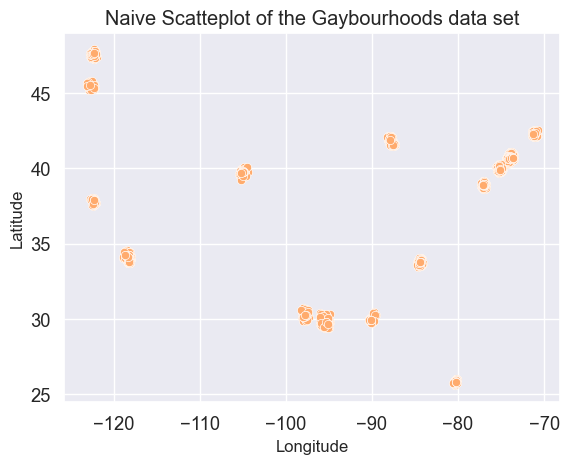

In [4]:
plot_naive_scatter1 = sns.scatterplot(data=gb, x="long", y="lat")
_ = plot_naive_scatter1.set(
    xlabel="Longitude",
    ylabel="Latitude",
    title="Naive Scatteplot of the Gaybourhoods data set"
)

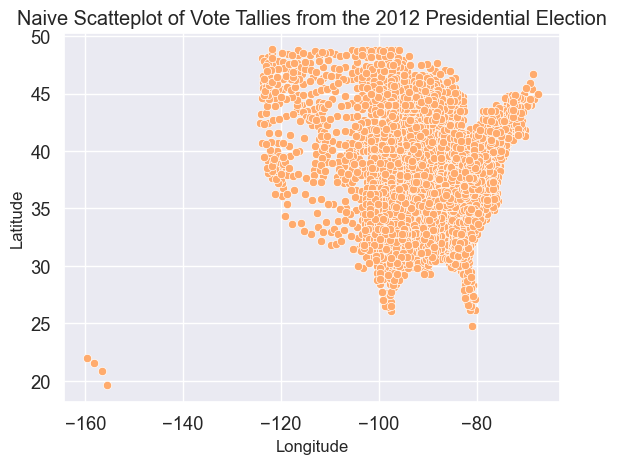

In [5]:
plot_naive_scatter2 = sns.scatterplot(data=pol, x="long", y="lat")
_ = plot_naive_scatter2.set(
    xlabel="Longitude",
    ylabel="Latitude",
    title="Naive Scatteplot of Vote Tallies from the 2012 Presidential Election"
)

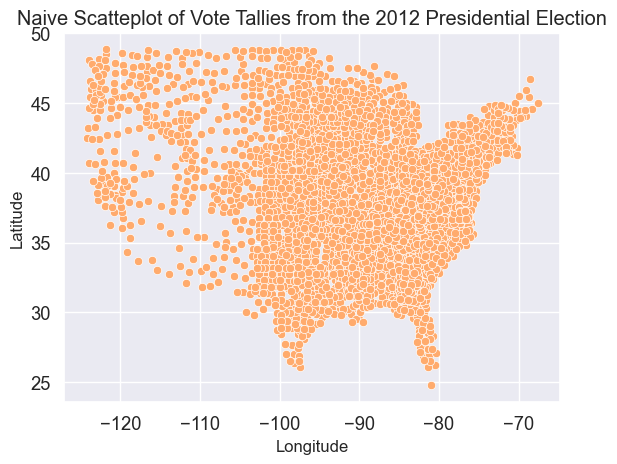

In [6]:
pol = pol[pol["long"] > -140]

plot_naive_scatter3 = sns.scatterplot(data=pol, x="long", y="lat")
_ = plot_naive_scatter3.set(
    xlabel="Longitude",
    ylabel="Latitude",
    title="Naive Scatteplot of Vote Tallies from the 2012 Presidential Election"
)

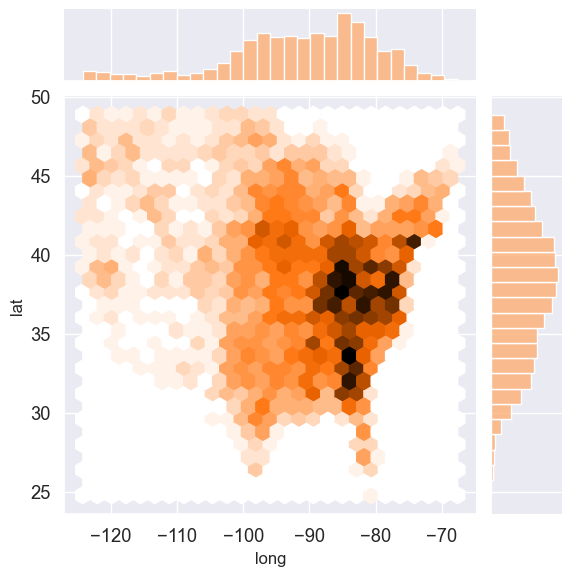

In [7]:
plot_naive_hexbin = sns.jointplot(data=pol, x="long", y="lat", kind="hex")

Looks good, good Job Nat - I have one suggestion tho

<Axes: xlabel='long', ylabel='lat'>

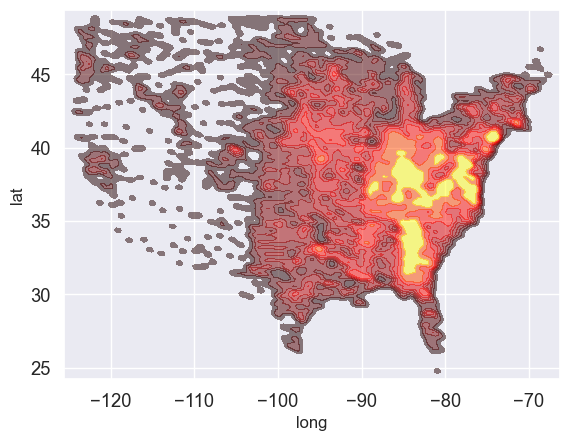

In [8]:
sns.kdeplot(data=pol, x="long", y="lat", fill=True, cmap="hot", bw_adjust=0.15, alpha=0.5)

Now the population centers we look for are a bit more obvious

Heres more of Nat's graphs:

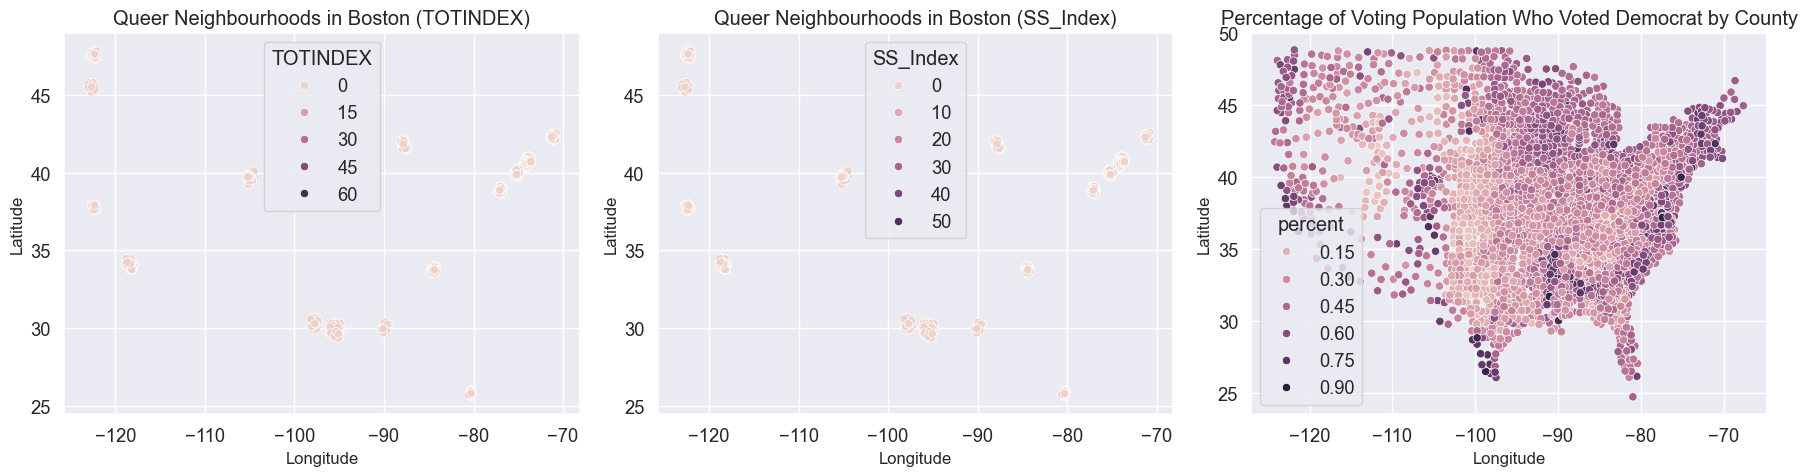

In [9]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5)) #messed with figure size

plot_ny_scatter1 = sns.scatterplot(ax=axes[0], data=gb, x="long", y="lat", hue="TOTINDEX")
axes[0].set(xlabel="Longitude", ylabel="Latitude", title="Queer Neighbourhoods in Boston (TOTINDEX)")

plot_ny_scatter2 = sns.scatterplot(ax=axes[1], data=gb, x="long", y="lat", hue="SS_Index")
axes[1].set(xlabel="Longitude", ylabel="Latitude", title="Queer Neighbourhoods in Boston (SS_Index)")

plot_democrat_scatter = sns.scatterplot(ax=axes[2], data=pol, x="long", y="lat", hue="percent")
axes[2].set(xlabel="Longitude", ylabel="Latitude", title="Percentage of Voting Population Who Voted Democrat by County")

plt.tight_layout(); plt.show()

At this part of the trail Nat printed one for the city of boston, so lets use our culture method from last time

In [55]:
from sklearn.cluster import KMeans

dfcity = pd.DataFrame(gb)

kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(dfcity[['lat', 'long',]])

dfcity['cluster'] = kmeans.labels_ + 1; dfcity.head(10)

names = [   'Houston', 'Boston', 'San Francisco',
            'Chicago', 'Atlanta', 'Seattle',
            'Denver', 'Philadelphia', 'Los Angeles',
            'Miami', 'New Orleans', 'New York',
            'Washington', 'Austin', 'Portland']

cluster_mapping = {i + 1: word for i, word in enumerate(names)}

dfcity['city'] = dfcity['cluster'].map(cluster_mapping)

dfcity.head(10)

C:\Users\samia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Unnamed: 0,SS_Index,TOTINDEX,lat,long,kinsey,percent_democrat,neighbourhood_kinsey,cluster,city
0,0,55.012669,67.077054,34.093828,-118.381697,6,0.456450,1.132075,9,Los Angeles
1,1,58.412517,61.866815,37.758057,-122.435410,6,0.742633,2.533333,3,San Francisco
2,2,30.731192,37.908747,40.742039,-74.000620,6,0.775215,1.091667,12,New York
3,3,21.995808,37.530067,40.734012,-74.006746,6,0.794248,1.101695,12,New York
4,4,21.284224,35.843573,37.773134,-122.411167,5,0.742633,2.533333,3,San Francisco
5,5,20.524688,35.299180,29.967440,-90.064783,5,0.802988,0.565217,11,New Orleans
6,6,26.870973,35.141959,38.919144,-77.037381,6,0.711051,0.922078,13,Washington
7,7,25.003265,32.038585,47.611046,-122.293207,6,0.545340,1.925926,6,Seattle
8,8,17.519808,31.968980,33.799884,-84.385805,4,0.642833,1.535714,5,Atlanta
9,9,26.425592,31.293323,34.107810,-118.362247,6,0.456450,1.107143,9,Los Angeles


In [48]:
BostonDF = pd.DataFrame(dfcity.loc[dfcity['city'] == 'Boston' ]); BostonDF.head(10)

,Unnamed: 0,SS_Index,TOTINDEX,lat,long,kinsey,percent_democrat,neighbourhood_kinsey,cluster,city
26,26,11.079100,21.470289,42.350579,-71.076397,3,0.774464,1.300000,2,Boston
28,28,11.127326,20.328385,42.357768,-71.064858,3,0.774464,1.254902,2,Boston
31,31,25.862374,19.713170,42.337582,-71.070482,6,0.774464,1.250000,2,Boston
44,44,21.984843,15.757502,42.309174,-71.113835,6,0.774464,1.188679,2,Boston
68,68,15.364102,11.012126,42.284333,-71.126228,4,0.568586,1.234043,2,Boston
75,75,12.820099,10.365198,42.350518,-71.059077,3,0.774464,1.285714,2,Boston
82,82,0.000000,10.000000,42.347476,-71.082035,0,0.774464,1.264151,2,Boston
105,105,11.883894,8.517709,42.315682,-71.055555,3,0.774464,1.255319,2,Boston
112,112,6.613113,8.269320,42.347635,-71.103082,1,0.774464,1.264151,2,Boston
133,133,8.471465,7.248342,42.362986,-71.103353,2,0.774464,1.240741,2,Boston


Now lets make Nats graph again

C:\Users\samia\AppData\Local\Temp\ipykernel_2556\3034139354.py:9: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  plot_ny_scatter21 = sns.kdeplot(ax=axes[1, 0], data=BostonDF, x="long", y="lat", hue="TOTINDEX", fill=True, cmap="hot", bw_adjust=0.85, alpha=0.5)
C:\Users\samia\AppData\Local\Temp\ipykernel_2556\3034139354.py:9: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  plot_ny_scatter21 = sns.kdeplot(ax=axes[1, 0], data=BostonDF, x="long", y="lat", hue="TOTINDEX", fill=True, cmap="hot", bw_adjust=0.85, alpha=0.5)
C:\Users\samia\AppData\Local\Temp\ipykernel_2556\3034139354.py:9: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  plot_ny_scatter21 = sns.kdeplot(ax=axes[1, 0], data=BostonDF, x="long", y="lat", hue="TOTINDEX", fill=True, cmap="hot", bw_adju

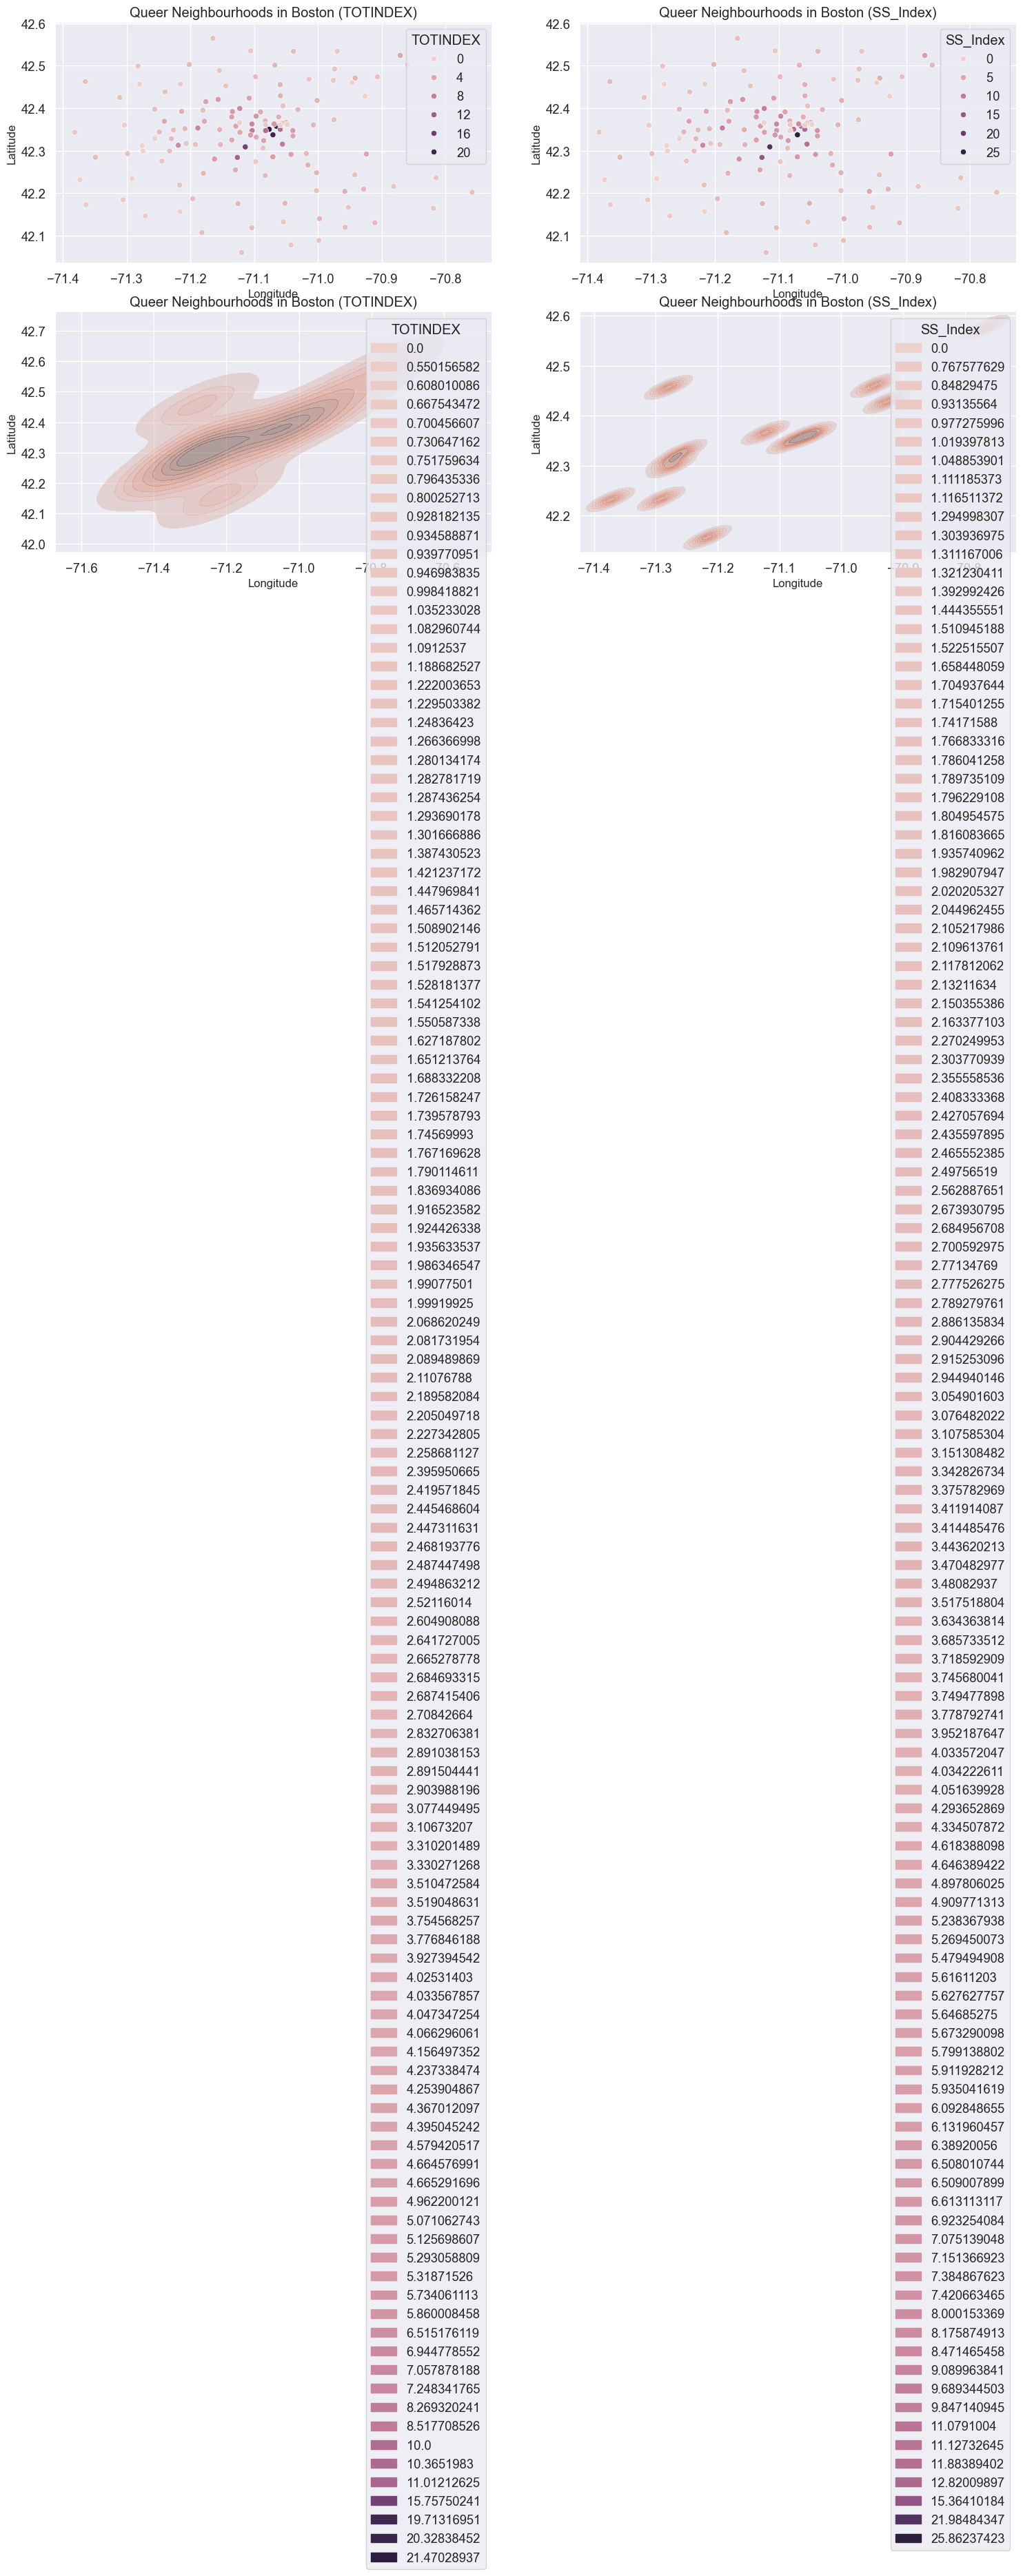

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10)) #messed with figure size

plot_ny_scatter1 = sns.scatterplot(ax=axes[0, 0], data=BostonDF, x="long", y="lat", hue="TOTINDEX")
axes[0, 0].set(xlabel="Longitude", ylabel="Latitude", title="Queer Neighbourhoods in Boston (TOTINDEX)")

plot_ny_scatter2 = sns.scatterplot(ax=axes[0, 1], data=BostonDF, x="long", y="lat", hue="SS_Index")
axes[0, 1].set(xlabel="Longitude", ylabel="Latitude", title="Queer Neighbourhoods in Boston (SS_Index)")

plot_ny_scatter21 = sns.kdeplot(ax=axes[1, 0], data=BostonDF, x="long", y="lat", hue="TOTINDEX", fill=True, cmap="hot", bw_adjust=0.85, alpha=0.5)
axes[1, 0].set(xlabel="Longitude", ylabel="Latitude", title="Queer Neighbourhoods in Boston (TOTINDEX)")

plot_ny_scatter22 = sns.kdeplot(ax=axes[1, 1], data=BostonDF, x="long", y="lat", hue="SS_Index", fill=True, cmap="hot", bw_adjust=0.15, alpha=0.5)
axes[1, 1].set(xlabel="Longitude", ylabel="Latitude", title="Queer Neighbourhoods in Boston (SS_Index)")

plt.tight_layout(); plt.show() #fill=True, cmap="hot", bw_adjust=0.15, alpha=0.5)